In [43]:
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from kohenen_map import KohonenNetwork 
from kohonen_layer_topologies import Topology


In [44]:
df = pd.read_csv('iris.csv').drop("Id", axis=1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<Figure size 1000x600 with 0 Axes>

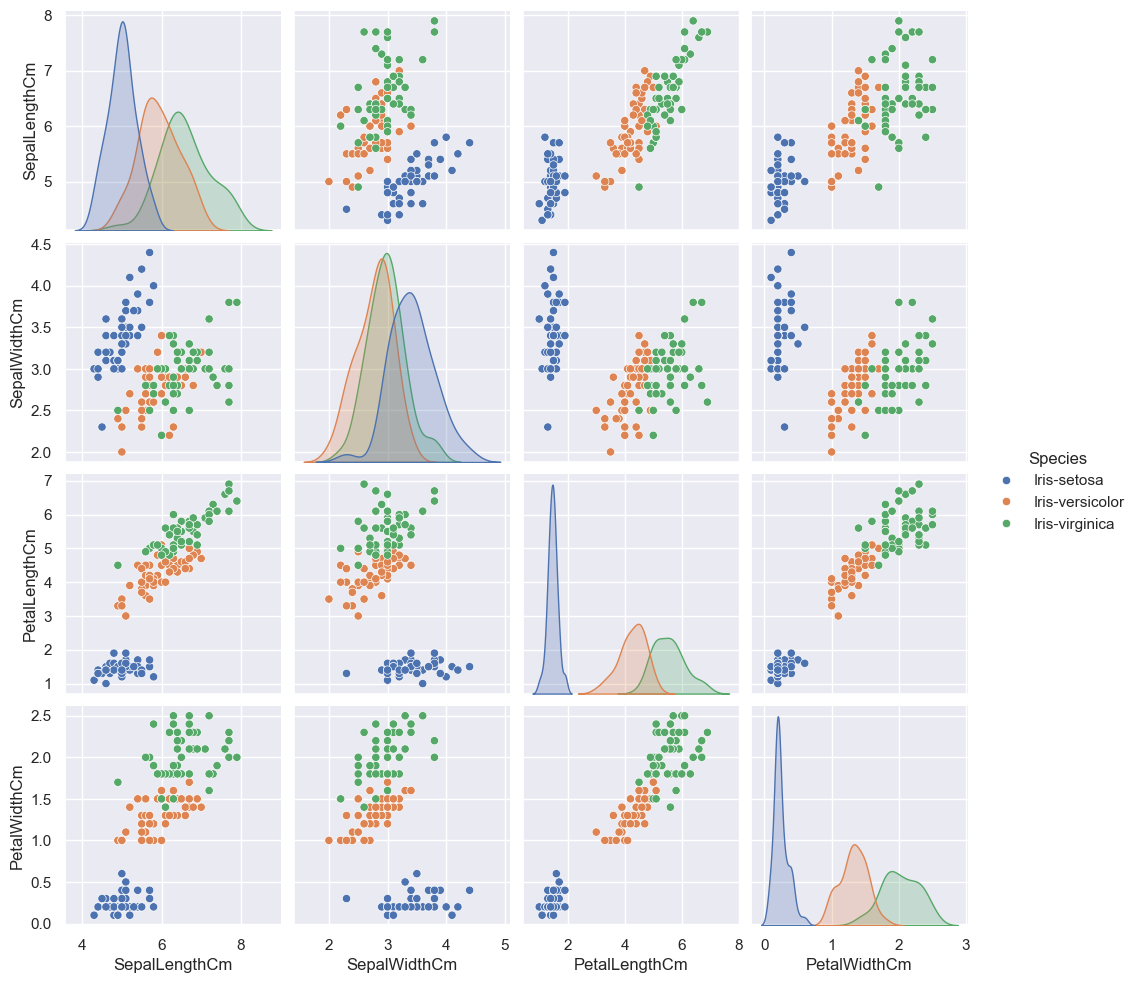

In [45]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.pairplot(data=df, hue="Species")

In [46]:
features = df.drop("Species", axis=1)
normalized_input_patterns = ((features - features.min()) / (features.max() - features.min())).values

In [47]:
from collections import Counter

def map_cluster_to_species(predicted_df):
    unique_clusters = predicted_df["Cluster"].unique()
    clusters_to_label = {}
    
    for cluster in unique_clusters:
        clusters_to_label[cluster] = []
        
    for cluster, species in zip(predicted_df["Cluster"], df["Species"]):
        clusters_to_label[cluster].append(species)
        
    map_clusters = {}
    
    for cluster in clusters_to_label:
        counter = Counter(clusters_to_label[cluster])
            
        map_clusters[cluster] = counter.most_common(1)[0][0]
        
    return map_clusters

In [48]:
from sklearn.metrics import accuracy_score

learning_rate = 0.00001
learning_rate_step = 0.00001
learning_rate_stop = 0.005

learning_rate_values = np.arange(learning_rate, learning_rate_stop, learning_rate_step)

num_of_epochs = 100
lr_decay = 0.99

accuracies_lr = []
learning_rates = []

for lr in learning_rate_values:
    
    kohonen = KohonenNetwork(4, 100, (10,10), Topology.HEXAGONAL)
    start_time = time.time()
    
    kohonen.train_network(normalized_input_patterns, lr, 4, num_of_epochs, lr_decay)
    
    end_time = time.time()
    predicted_labels = kohonen.predict_labels(normalized_input_patterns)
    predicted_df = features.copy(True)
    predicted_df["Cluster"] = predicted_labels
    cluster_to_species_map = map_cluster_to_species(predicted_df)
    for i in range(len(predicted_df)):
        predicted_df.at[i, "Species"] = cluster_to_species_map[predicted_df.at[i, "Cluster"]]
    acc = accuracy_score(df['Species'], predicted_df["Species"])
    accuracies_lr.append(acc)
    learning_rates.append(learning_rate)
    print(f"Learning rate: {learning_rate}, accuracy: {acc}, time: {end_time - start_time}")
    learning_rate += learning_rate_step


Learning rate: 1e-05, accuracy: 0.6133333333333333, time: 2.0293641090393066
Learning rate: 2e-05, accuracy: 0.6533333333333333, time: 1.8178832530975342
Learning rate: 3.0000000000000004e-05, accuracy: 0.68, time: 1.8309011459350586
Learning rate: 4e-05, accuracy: 0.72, time: 1.8850669860839844
Learning rate: 5e-05, accuracy: 0.72, time: 1.8195390701293945
Learning rate: 6e-05, accuracy: 0.7133333333333334, time: 1.8934166431427002
Learning rate: 7.000000000000001e-05, accuracy: 0.7333333333333333, time: 1.841005563735962
Learning rate: 8e-05, accuracy: 0.7666666666666667, time: 1.9031591415405273
Learning rate: 9e-05, accuracy: 0.76, time: 1.7755727767944336
Learning rate: 0.0001, accuracy: 0.76, time: 1.8588159084320068
Learning rate: 0.00011, accuracy: 0.76, time: 1.8111910820007324
Learning rate: 0.00012, accuracy: 0.7933333333333333, time: 1.879664659500122
Learning rate: 0.00013000000000000002, accuracy: 0.7533333333333333, time: 1.867833137512207
Learning rate: 0.00014000000000

In [49]:
import math
from sklearn.metrics import accuracy_score

n = 2
n_step = 1
n_limit = 20
num_of_epochs = 100
lr_decay = 0.99
number_of_neurodes = np.arange(n, n_limit, n_step)

accuracies_n = []
neurons_in_layer = []

for neurodes in number_of_neurodes:
    kohonen = KohonenNetwork(4, neurodes**2, (neurodes,neurodes), Topology.HEXAGONAL)
    start_time = time.time()
    
    kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes/1.5), num_of_epochs, lr_decay)
    
    end_time = time.time()
    predicted_labels = kohonen.predict_labels(normalized_input_patterns)
    predicted_df = features.copy(True)
    predicted_df["Cluster"] = predicted_labels
    cluster_to_species_map = map_cluster_to_species(predicted_df)
    for i in range(len(predicted_df)):
        predicted_df.at[i, "Species"] = cluster_to_species_map[predicted_df.at[i, "Cluster"]]
    acc = accuracy_score(df['Species'], predicted_df["Species"])
    accuracies_n.append(acc)
    neurons_in_layer.append(n)
    print(f"Number of neurons in kohonen layer: {n}, accuracy: {acc}, time: {end_time - start_time}")
    n += n_step

Number of neurons in kohonen layer: 2, accuracy: 0.64, time: 0.2611989974975586
Number of neurons in kohonen layer: 3, accuracy: 0.64, time: 0.3499135971069336
Number of neurons in kohonen layer: 4, accuracy: 0.66, time: 0.5098099708557129
Number of neurons in kohonen layer: 5, accuracy: 0.7, time: 0.667111873626709
Number of neurons in kohonen layer: 6, accuracy: 0.76, time: 0.8946127891540527
Number of neurons in kohonen layer: 7, accuracy: 0.7733333333333333, time: 1.0970649719238281
Number of neurons in kohonen layer: 8, accuracy: 0.7866666666666666, time: 1.3088703155517578
Number of neurons in kohonen layer: 9, accuracy: 0.7466666666666667, time: 1.5228271484375
Number of neurons in kohonen layer: 10, accuracy: 0.7933333333333333, time: 1.873239517211914
Number of neurons in kohonen layer: 11, accuracy: 0.7733333333333333, time: 2.168980836868286
Number of neurons in kohonen layer: 12, accuracy: 0.84, time: 2.3743553161621094
Number of neurons in kohonen layer: 13, accuracy: 0.8,

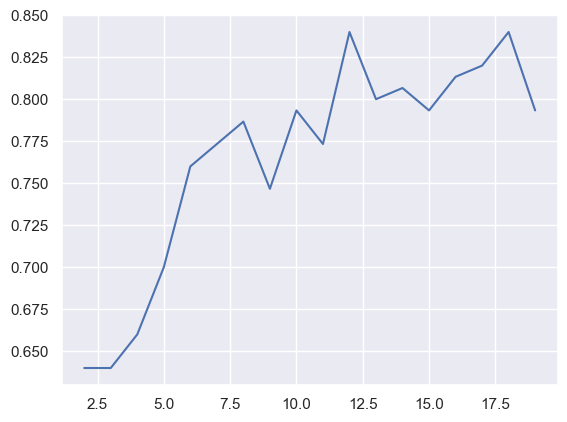

In [50]:
plt.plot(neurons_in_layer, accuracies_n)


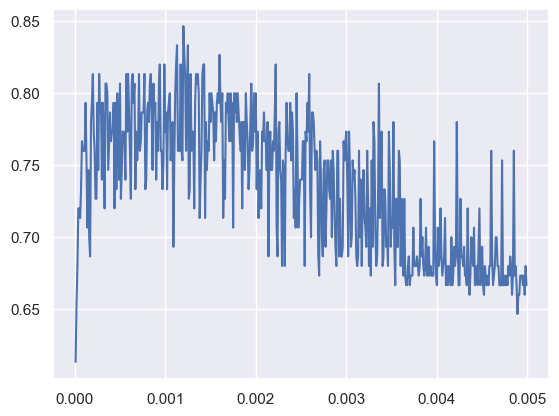

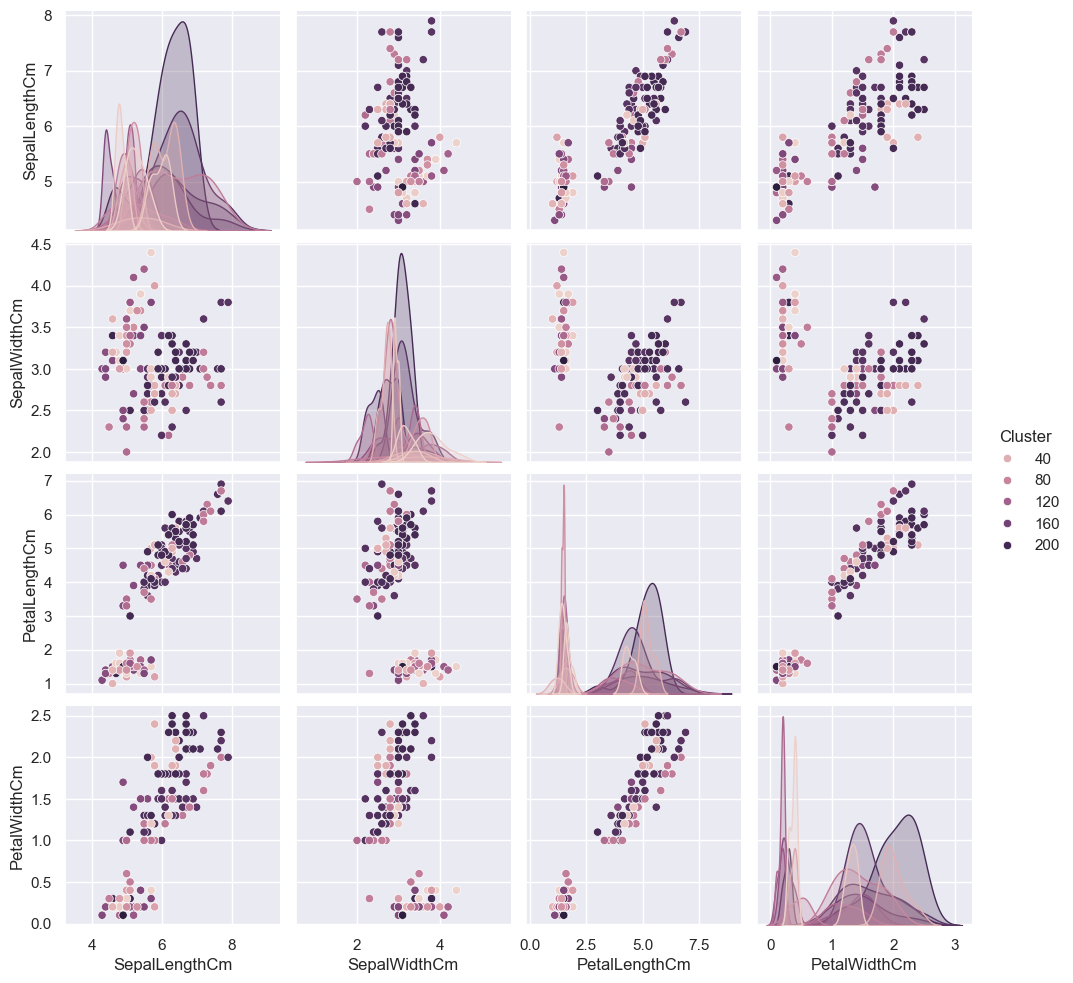

In [58]:
from pandas import DataFrame
plt.plot(learning_rates, accuracies_lr)
kohonen = KohonenNetwork(4,225,(15,15),Topology.HEXAGONAL)
kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(225*0.8), 100, 0.99)
predicted_labels = kohonen.predict_labels(normalized_input_patterns)
predicted_df = features.copy(True)
predicted_df["Cluster"] = predicted_labels
sns.pairplot(predicted_df, hue="Cluster")


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   SortOrder  
0          0  
1          0  
2          0  
3          0  
4          0  
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


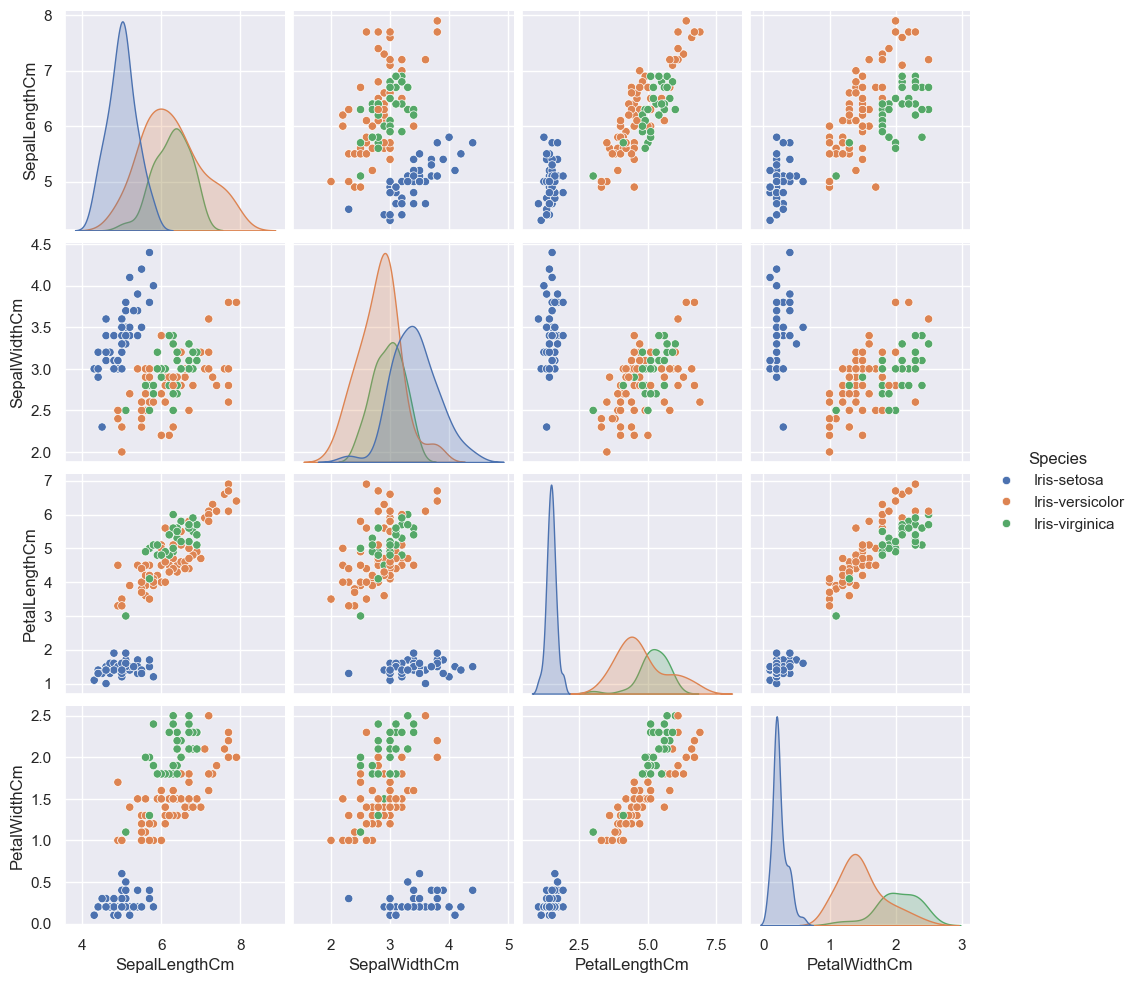

In [59]:
#merge clusters
map_clusters = map_cluster_to_species(predicted_df)

for i in range(len(predicted_df)):
    predicted_df.at[i, "Species"] = map_clusters[predicted_df.at[i, "Cluster"]]

predicted_df.drop(["Cluster"], axis=1, inplace=True)
custom_order = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
predicted_df["SortOrder"] = predicted_df["Species"].map(custom_order)
predicted_df.sort_values("SortOrder")
predicted_df.drop(["SortOrder"], axis=1, inplace=True)
sns.pairplot(predicted_df, hue="Species")


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(df["Species"], predicted_df["Species"])
confusion_matrix = confusion_matrix(df["Species"], predicted_df["Species"])

print(accuracy)
print(confusion_matrix)

0.84
[[50  0  0]
 [ 0 46  4]
 [ 0 20 30]]


In [54]:

num_of_epochs = 100
lr_decay = 0.99

neurodes_number = 400
shape = (20, 20)


neigbourhood = 1
neigbourhood_step = 1
neigbourhood_limit = shape[0]
neighbourhood_range = np.arange(neigbourhood, neigbourhood_limit, neigbourhood_step)

accuracies_n = [0] * len(neighbourhood_range)
for _ in range(0, 10):
    i = 0
    for n in neighbourhood_range:
    
        kohonen = KohonenNetwork(4, neurodes_number, shape, Topology.HEXAGONAL)
        start_time = time.time()
        
        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number/n), num_of_epochs, lr_decay)
        
        end_time = time.time()
        predicted_labels = kohonen.predict_labels(normalized_input_patterns)
        predicted_df = features.copy(True)
        predicted_df["Cluster"] = predicted_labels
        cluster_to_species_map = map_cluster_to_species(predicted_df)
        for j in range(len(predicted_df)):
            predicted_df.at[j, "Species"] = cluster_to_species_map[predicted_df.at[j, "Cluster"]]
        acc = accuracy_score(df['Species'], predicted_df["Species"])
        accuracies_n[i] += acc
        print(f"Number of neighbours: {n}, accuracy: {acc}, time: {end_time - start_time}")
        i += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/10

Number of neighbours: 1, accuracy: 0.8133333333333334, time: 6.4879350662231445
Number of neighbours: 2, accuracy: 0.8066666666666666, time: 6.59010910987854
Number of neighbours: 3, accuracy: 0.8066666666666666, time: 6.557165861129761
Number of neighbours: 4, accuracy: 0.82, time: 6.6216349601745605
Number of neighbours: 5, accuracy: 0.82, time: 6.434677362442017
Number of neighbours: 6, accuracy: 0.8, time: 6.691222667694092
Number of neighbours: 7, accuracy: 0.8, time: 6.491783142089844
Number of neighbours: 8, accuracy: 0.7933333333333333, time: 6.438221454620361
Number of neighbours: 9, accuracy: 0.84, time: 6.623892068862915
Number of neighbours: 10, accuracy: 0.8466666666666667, time: 6.479771375656128
Number of neighbours: 11, accuracy: 0.8533333333333334, time: 6.471024513244629
Number of neighbours: 12, accuracy: 0.8133333333333334, time: 6.611701726913452
Number of neighbours: 13, accuracy: 0.8266666666666667, time: 6.468002557754517
Number of neighbours: 14, accuracy: 0.81

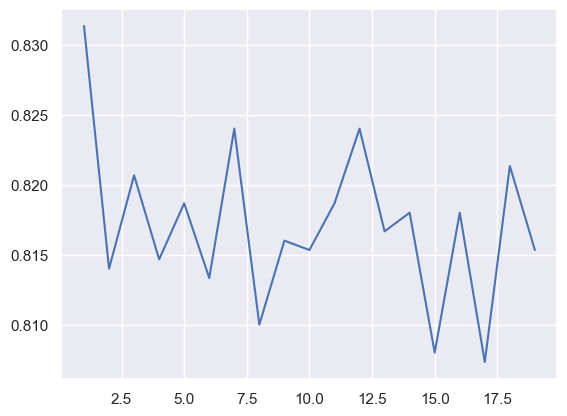

In [55]:
plt.plot(neighbourhood_range, accuracies_n)

In [63]:

num_of_epochs = 100
lr_decay = 0.99

neurodes_number = 400
shape = (20, 20)

topologies = [Topology.HEXAGONAL, Topology.RECTANGLE]
accuracies_n = [0] * len(topologies)
time_to_train = [0] * len(topologies)
for _ in range(0, 10):
    i = 0
    
    for n in topologies:
    
        kohonen = KohonenNetwork(4, neurodes_number,shape, n)
        start_time = time.time()
        
        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number/0.8), num_of_epochs, lr_decay)
        
        end_time = time.time()
        predicted_labels = kohonen.predict_labels(normalized_input_patterns)
        predicted_df = features.copy(True)
        predicted_df["Cluster"] = predicted_labels
        cluster_to_species_map = map_cluster_to_species(predicted_df)
        for j in range(len(predicted_df)):
            predicted_df.at[j, "Species"] = cluster_to_species_map[predicted_df.at[j, "Cluster"]]
        acc = accuracy_score(df['Species'], predicted_df["Species"])
        accuracies_n[i] += acc
        time_to_train[i] += end_time - start_time
        print(f"Topology {n}, accuracy: {acc}, time: {end_time - start_time}")
        i += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/10

Topology Topology.HEXAGONAL, accuracy: 0.7933333333333333, time: 6.2242536544799805
Topology Topology.RECTANGLE, accuracy: 0.7933333333333333, time: 6.356350660324097
Topology Topology.HEXAGONAL, accuracy: 0.82, time: 6.055091857910156
Topology Topology.RECTANGLE, accuracy: 0.7866666666666666, time: 6.378401756286621
Topology Topology.HEXAGONAL, accuracy: 0.8133333333333334, time: 6.069924354553223
Topology Topology.RECTANGLE, accuracy: 0.78, time: 6.349299430847168
Topology Topology.HEXAGONAL, accuracy: 0.78, time: 6.11414098739624
Topology Topology.RECTANGLE, accuracy: 0.7266666666666667, time: 6.328223943710327
Topology Topology.HEXAGONAL, accuracy: 0.8333333333333334, time: 6.0665364265441895
Topology Topology.RECTANGLE, accuracy: 0.7666666666666667, time: 6.364327907562256
Topology Topology.HEXAGONAL, accuracy: 0.8066666666666666, time: 6.1158764362335205
Topology Topology.RECTANGLE, accuracy: 0.78, time: 6.3785927295684814
Topology Topology.HEXAGONAL, accuracy: 0.8266666666666667

In [64]:
for i in range(len(time_to_train)):
    print(f"Topology {topologies[i]}, time to train {time_to_train[i]/10}, average accuracy: {accuracies_n[i]/10}")

Topology Topology.HEXAGONAL, time to train 6.114028000831604, average accuracy: 0.08193333333333333
Topology Topology.RECTANGLE, time to train 6.352578449249267, average accuracy: 0.07853333333333333


In [67]:
lr_decay = 0.99

neurodes_number = 400
shape = (20, 20)

number_of_epochs = np.arange(10, 300, 10)

accuracies_n = [0] * len(number_of_epochs)

for _ in range(0, 10):
    i = 0
    
    for n in number_of_epochs:
    
        kohonen = KohonenNetwork(4, neurodes_number,shape, Topology.HEXAGONAL)
        start_time = time.time()
        
        kohonen.train_network(normalized_input_patterns, 0.0005, math.floor(neurodes_number/0.8), n, lr_decay)
        
        end_time = time.time()
        predicted_labels = kohonen.predict_labels(normalized_input_patterns)
        predicted_df = features.copy(True)
        predicted_df["Cluster"] = predicted_labels
        cluster_to_species_map = map_cluster_to_species(predicted_df)
        for j in range(len(predicted_df)):
            predicted_df.at[j, "Species"] = cluster_to_species_map[predicted_df.at[j, "Cluster"]]
        acc = accuracy_score(df['Species'], predicted_df["Species"])
        accuracies_n[i] += acc
        print(f"Number of epochs - {n}, accuracy: {acc}, time: {end_time - start_time}")
        i += 1

for i in range(len(accuracies_n)):
    accuracies_n[i] = accuracies_n[i]/10

Number of epochs - 10, accuracy: 0.8066666666666666, time: 0.6922698020935059
Number of epochs - 20, accuracy: 0.7733333333333333, time: 1.262033224105835
Number of epochs - 30, accuracy: 0.8266666666666667, time: 1.9302394390106201
Number of epochs - 40, accuracy: 0.8066666666666666, time: 2.4631879329681396
Number of epochs - 50, accuracy: 0.7733333333333333, time: 2.9835336208343506
Number of epochs - 60, accuracy: 0.7666666666666667, time: 3.6963553428649902
Number of epochs - 70, accuracy: 0.8066666666666666, time: 4.39305305480957
Number of epochs - 80, accuracy: 0.8, time: 4.9025657176971436
Number of epochs - 90, accuracy: 0.8266666666666667, time: 5.5881028175354
Number of epochs - 100, accuracy: 0.8133333333333334, time: 6.152624845504761
Number of epochs - 110, accuracy: 0.7866666666666666, time: 6.8707849979400635
Number of epochs - 120, accuracy: 0.86, time: 7.4326817989349365
Number of epochs - 130, accuracy: 0.84, time: 8.001317739486694
Number of epochs - 140, accuracy:

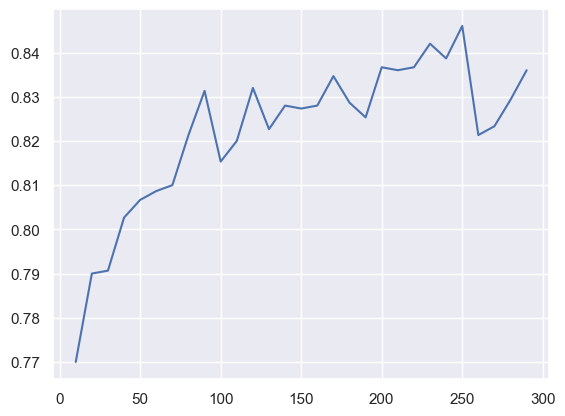

In [68]:
plt.plot(number_of_epochs, accuracies_n)